<a href="https://colab.research.google.com/github/zanevc5555/physics-applets/blob/main/SpinEnsembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

### Pauli Spin Matrices

#Cant be bothered re-typing this section

In [3]:
pauli_z = np.array([[1,0],[0,-1]])
pauli_x = np.array([[0,1],[1,0]])
pauli_y = np.array(((0,-1j),(1j,0)))
pauli = np.array([pauli_x, pauli_y, pauli_z])
I = np.array([[1,0],[0,1]])

print(pauli_z,pauli_x,pauli_y)

[[ 1  0]
 [ 0 -1]] [[0 1]
 [1 0]] [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]


## Spinors

#### Eigenspinors

Eigenvectors of the Paul spin matrices, e.g,

$\sigma_z \bar{\phi_z} = \lambda \bar{\phi_z} = \pm \bar{\phi_z}$

$\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \left | +_z \right \rangle$

$\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix}  0 \\ 1 \end{bmatrix} = -\left | -_z \right \rangle$


**In general**, spinor is a two-level quantum state corresponding to spin orientation and is the eigenvector of the spin operator $S_n = \frac{\hbar}{2}\sigma_n$.

Form of general spinor: $[\psi(\bold{x})] = \begin{bmatrix} \phi_1 \\ \phi_2 \end{bmatrix} = \phi_1 \left | +_z \right \rangle + \phi_2 \left | -_z \right \rangle$

***

## Bloch Sphere

The spin state orientation can be represented geometrically as an eigenvector on the Bloch Sphere:


![Spin state in Bloch Sphere representation](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7koXeZzlb7PsKeKZ1zc_n4Z4wFc9yhdStf4RjobHrvA&s)

$\left | 0 \right \rangle$ corresponds to the spin-up state $\left | +_z \right \rangle$ and $\left | 1 \right \rangle$ corresponds to the spin-down state $\left | -_z \right \rangle$
The Bloch state is described by two parameters; the polar angle $\theta$ and the azimuthal angle $\phi$

The direction of the Bloch state is the unit vector $\hat{n}$, also known as the Bloch vector.

In [4]:
def unitvector(theta, phi):
    if (theta < 0 or theta > np.pi or phi < 0 or phi > 2*np.pi):
        print("Invalid input")
    else:
        nx = np.sin(theta)*np.cos(phi)
        ny = np.sin(theta)*np.sin(phi)
        nz = np.cos(theta)
        return np.array([nx, ny, nz])
    
n = unitvector(np.pi/4, np.pi/4)
print(n)

[0.5        0.5        0.70710678]


The operator $A_{\pm} = \frac{1}{2} \left ( I \pm \vec{\sigma}\cdot \hat{n} \right )$ converting spin state to the corresponding Bloch states  is called the projection operator.

In [5]:
#print([n[i]*pauli[i,:,:] for i in range(n.size)])
def projop(theta, phi):
    unit = unitvector(theta, phi)
    if unit is None: return
    sigma_n = np.sum([unit[i]*pauli[i,:,:] for i in range(len(unit))], axis=0)
    A_plus = 0.5*(I + sigma_n)
    A_minus = 0.5*(I - sigma_n)
    return A_plus, A_minus

theta = np.pi/2
phi = 0
op1, op2 = projop(theta, phi)
print(op1)
print(op2)
print(op1/np.cos(theta/2))
print(op2/np.sin(theta/2))

projop(-1, -1)
       

[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]
[[0.70710678+0.j 0.70710678+0.j]
 [0.70710678+0.j 0.70710678+0.j]]
[[ 0.70710678+0.j -0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j]]
Invalid input


Applying either projection operator to a spinor results in one of the Bloch states (geometric representation of spin state) of the general form:

$\frac{A_+\left | 0 \right \rangle}{\cos(\frac{\theta}{2})} = \left | \zeta_n^+ \right \rangle = \cos(\frac{\theta}{2})\left | 0 \right \rangle + \sin(\frac{\theta}{2})e^{i\phi}\left | 1 \right \rangle$;

$\frac{A_-\left | 0 \right \rangle}{\sin(\frac{\theta}{2})} =\left | \zeta_n^- \right \rangle = \sin(\frac{\theta}{2})\left | 0 \right \rangle - \cos(\frac{\theta}{2})e^{i\phi}\left | 1 \right \rangle$

In [6]:
def Bloch(theta, phi):
    #Check for valid input
    unit = unitvector(theta, phi)
    if unit is None: return
    #Bloch state formulae
    bloch_plus = [np.cos(theta/2), np.sin(theta/2)*np.exp(1j*phi)]
    bloch_minus = [np.sin(theta/2), -1*np.cos(theta/2)*np.exp(1j*phi)]
    return bloch_plus, bloch_minus

spin1, spin2 = Bloch(np.pi/2, 0)
print(spin1)
print(spin2)

[0.7071067811865476, (0.7071067811865475+0j)]
[0.7071067811865475, (-0.7071067811865476+0j)]


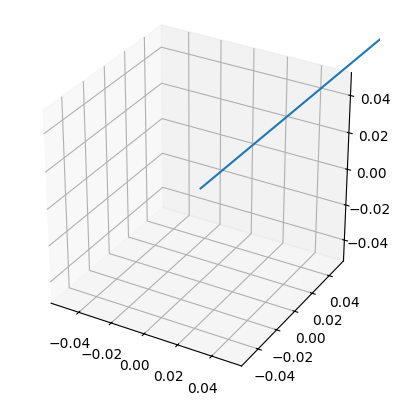

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_aspect("equal")

#draw the arrow
ax.quiver(0,0,0,1,1,1,length=1.0)

plt.show()

In [8]:
#Extract Bloch sphere coordinates from spinor
def BlochAngles(spinor):
    #Convert complex coeffs into polar form
    mags = np.abs(spinor)
    angles = np.angle(spinor)
    #Calculate bloch spherical coords
    theta = 2*np.arctan(mags[1]/mags[0])
    phi = angles[1]-angles[0]
    return theta, phi

ang1, ang2 = BlochAngles([1,0])
print(ang1, ang2)

0.0 0.0


## Gate Matrices

### Hadamard Gate

Commonly used quantum gate. The eigenvector of the Hadamard matrix is in the x-z plane, halfway between the north pole and the point where the positive x-axis pierces the Bloch sphere.

$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

In [9]:
hadamard = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
pole = np.array([1,0])
new_state = pole @ hadamard
print(new_state)
theta, phi = BlochAngles(new_state)
print(180*theta/np.pi, 180*phi/np.pi)


[0.70710678 0.70710678]
90.0 0.0


In [10]:
#Solve Hadamard eigenvalue equation
eigvals, eigvecs = np.linalg.eig(hadamard)
print(eigvals)
print(eigvecs)

#NOTE: Each eigenvector does NOT correspond to a sublist in 'eigvecs',
#i.e., v_1 = eigvecs[:,0] as opposed to eigvecs[0]

theta1,phi1 = BlochAngles(eigvecs[:,0])
print(180*theta1/np.pi, 180*phi1/np.pi)
theta2,phi2 = BlochAngles(eigvecs[:,1])
print(180*theta2/np.pi, 180*phi2/np.pi)

[ 1. -1.]
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]
45.0 0.0
135.0 -180.0


### Spin Flip matrix

Transforms any spinor $\left | \zeta_n^- \right \rangle$ to the orthonormal spinor $\left | \zeta_n^+ \right \rangle$:

$M = \begin{bmatrix} 0 & -e^{-i\phi} \\ e^{i\phi} & 0 \end{bmatrix}$, where $\phi$ is a parameter of $\left | \zeta_n^- \right \rangle$.

M can be written as a product of some well-known 2x2 matrices:

$M = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & e^{-i\phi} \end{bmatrix}$

$  = e^{i\frac{\pi}{2}}P(\phi)\sigma_yP(-\phi)$

 where $P(\phi)$ is the phase shift matrix.

In [11]:
def spin_flip(phi):
    M = np.array([[0,-1*np.exp(-1j*phi)],[np.exp(1j*phi),0]])
    return M

### Rotation Matrices

Using the identity $e^{i\theta \hat{A}} = \cos\theta\hat{I} + i\sin\theta\hat{A}$,

the three rotation matrices in each Cartesian axis are given as:

$ R_x(\theta) = \begin{bmatrix} \cos \frac{\theta}{2} & -i\sin\frac{\theta}{2} \\ -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{bmatrix}$

$ R_y(\theta) = \begin{bmatrix} \cos \frac{\theta}{2} & -\sin\frac{\theta}{2} \\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2} \end{bmatrix}$

$ R_z(\theta) = \begin{bmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}$

In [12]:
def Rx(theta):
    Rx = np.array([np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)])
    return Rx

def Ry(theta):
    Ry = np.array([np.cos(theta/2), -1*np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)])
    return Ry

def Rz(theta):
    Rz = np.array([[np.exp(-1j*theta/2), 0], [0, np.exp(1j*theta/2)]])
    return Rz

***
## Time Evolution of Electron Spin due to Magnetic field

Spintronics relies on models of spinor time-evolution in a bulk semiconductor to explain useful magneto-electronic properties of solid-state materials exposed to applied magnetic fields.

An equation ubiquitous with spintronics which succintly describes the relevant electron spin dynamics is the **Rabi Formula**, which will be computed in this Section to graph the time-dependent spin-flip probability of a spinor initially in the  state.

### Spin precession about an external Magnetic Field

The time evolution in Pauli spin state is given by the Ehrenfest theorem:

$\frac{d\left \langle \vec{\sigma} \right \rangle}{dt} = \frac{g\mu_B}{\hbar}\left ( \vec{B} \times \left \langle \vec{\sigma} \right \rangle \right )$,

where $ \left \langle \vec{\sigma}_n \right \rangle = \left \langle \zeta_n^+ | \sigma_n | \zeta_n^+ \right \rangle$

Electron spin is analogous to the particle's magnetic moment when an external magnetic field is applied. In the same manner as Larmor precession, the Bloch vector representing the spin state will orbit about the axis of the external field.


<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Precession_in_magnetic_field.svg" width="100"/>
<p> Figure: The magnetic moment of a nucleus precesses around the direction of an external magnetic field (green).
</p>
</div>

The precession rate is identical to the Larmor frequency of the spin magnetic moment. For example, a constant magnetic field in the z-axis will produce an azimuthal angular velocity:

$\frac{d\phi}{dt} = \frac{g\mu_B|\vec{B_z}|}{\hbar}$



In [13]:
#Define constants

#Gyromagnetic ratio
g = -2.0
#Bohr magneton
uB = 9.274e-24
#Reduced planck's constant
h = 1.054e-34


### Two magnetic fields at right angles

A magnetic field in the x-y plane will make the spin Bloch vector rotate across the polar angle. An electron spin in the $\left | +_z \right \rangle$ will flip to $\left | -_z \right \rangle$ and back to the initial state at a frequency equal to twice the x-y precession frequency.

When the applied magnetic field has a z-component and a x/y-component, the spin state will flip at a much lower frequency, unless the x/y-component rotates such that it is continually orthogonal to the spinor direction $\hat{n}$:

$\vec{B} = \left ( B_{xy}\cos(\omega t), B_{xy}\sin(\omega t), B_z \right )$

In [14]:
t = np.linspace(0, 2*np.pi, 100)
#Time-dependent external magnetic field
def B_field(XYmag, Zmag, freq):
    #Magnetic field vector
    B = np.array([XYmag*np.cos(freq*t), Zmag*np.sin(freq*t), Bz])
    return B

### Time Evolution of Spinor direction $\hat{n}$

Matrix representation of time evolution:

$\frac{d\hat{n}}{dt} = [X]\hat{n}$

$[X]= \frac{g\mu_B}{\hbar}\begin{bmatrix}
0 & -B_z & B_y \\
B_z & 0 & -B_x \\
-B_y & B_x & 0 \end{bmatrix}$

After some linear algebra, we arrive at this equation:

$\hat{n}(t) = [U]\hat{n}(0)$

$[U] = \begin{bmatrix} 
g\sin\omega t+h\cos\omega t & g\cos\omega t - \cos\delta\sin\omega t & (f\cos\omega t \cos\chi - \sin\delta\sin\omega t)\sin\chi \\
-g\cos\omega t + h\sin\omega t & g\sin\omega t + \cos\delta\cos\omega t & (f\sin\omega t \cos\chi + \sin\delta\cos\omega t)\sin\chi \\
f\cos\chi\sin\chi & -\sin\delta\sin\chi & \cos^2\chi + \sin^2\chi\cos\delta \end{bmatrix}$;

$f = 1 - \cos\delta$    
$h = \cos\delta\cos^2\chi + \sin^2\chi$    
$g = \sin\delta\cos\chi$;

$\delta = \sqrt{(\omega - \omega_0)^2+\omega_1^2}t$     
$\chi = \tan^{-1}\left ( \frac{\omega_1}{\omega_0 - \omega} \right )$;

$\omega_0 = \frac{g\mu_BB_z}{\hbar}$     
$\omega_1 = \frac{g\mu_BB_{xy}}{\hbar}$

In [84]:
from numpy import sin, cos

# X Matrix
def X(Bmag):
    X = g*uB/h*np.array([[0, -1*Bmag[2], Bmag[1]],[Bmag[2], 0, -1*Bmag[0]],[-1*Bmag[1], Bmag[0], 0]])
    return X

# U Matrix
def UMx(Bxy, Bz, w):
    T = np.tile(t, (3,1)).T
    w0 = g*uB*Bz/h
    w1 = g*uB*Bxy/h
    chi = np.arctan(w1/(w0-w))
    delta = np.sqrt((w-w0)**2+w1**2)*T

    coswt = cos(w*T)
    sinwt = sin(w*T)
    coschi = cos(chi)
    sinchi = sin(chi)
    cosdel = cos(delta)
    sindel = sin(delta)

    F = 1.0 - cosdel
    G = sindel*coschi
    H = cosdel*coschi**2 + sinchi**2

    U = np.array([[G*sinwt + H*coswt, G*coswt - cosdel*sinwt, sinchi*(F*coschi*coswt-sindel*sinwt)],
                  [H*sinwt - G*coswt, G*sinwt + cosdel*coswt, sinchi*(F*sinwt*coschi + sindel*coswt)],
                  [F*coschi*sinchi, -1*sindel*sinchi, coschi**2 + cosdel*sinchi**2]])
    
    return U

### The Rabi Formula

The probability for any arbitrary spinor to be eventually located at the south pole is given by 

$ \left | \left \langle 1 | \zeta_n^{+} \right \rangle \right |^2 = \sin^2\left ( \frac{\theta(t)}{2} \right ) = \frac{1-\cos(\theta(t))}{2}$, which is equal to

$ \sin^2\left ( \frac{\theta(t)}{2} \right ) = \frac{1 - n_z(t)}{2}$

While the above formula will calculate the time-dependent probability to reach the south pole for an arbitrary spinor, the Rabi formula pertains to the special case when the spinor is set initially at the north pole:

$ \hat{n}(t) = (n_x(t), n_y(t), n_z(t)) = [U]\hat{n}(0) = [U]\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} $        
$n_z(t) = \cos^2\chi + \sin^2\chi\cos\delta$   
      
$\sin^2\left ( \frac{\theta(t)}{2} \right ) = \frac{1 - n_z(t)}{2} = \frac{\sin^2(\chi(t))}{2}[1-\cos\delta(t)]$

At a given time, the spinor is determined to be at the south pole if the formula equates to a value of *1*.

In [88]:
#Probability of a spin-flip for initial spinor at north pole

def RabiProb(Bxy, Bz, w):
    w0 = g*uB*Bz/h
    w1 = g*uB*Bxy/h
    chi = np.arctan(w1/(w0-w))
    delta = np.sqrt((w-w0)**2+w1**2)*np.tile(t, (3,1)).T

    sinchi = sin(chi)
    cosdel = cos(delta)

    prob = (1.0 - cosdel)*sinchi**2/2.0
    return prob.T

#Probability of a spin-flip for arbitrary initial spinor

def GenProb(U, n0):
    #Get z-component of direction vector for all values of t
    #I.e, n(t) = [ U[0,0,:]*n0[0] + U[0,1,:]*n0[1] + U[0,2,:]*n0[2],
    #              U[1,0,:]*n0[0] + U[1,1,:]*n0[1] + U[1,2,:]*n0[2],
    #    -->       U[2,0,:]*n0[0] + U[2,1,:]*n0[1] + U[2,2,:]*n0[2] ]
    nz = U[2,0,:,:]*n0[0] + U[2,1,:,:]*n0[1] + U[2,2,:,:]*n0[2]
    prob = (1.0 - nz)/2.0
    return prob.T

def Delta(Bxy, Bz, w):
    w0 = g*uB*Bz/h
    w1 = g*uB*Bxy/h
    delta = np.sqrt((w-w0)**2+w1**2)*t
    return delta

## Plotting

### Time-dependent probability of spin-flip starting from +z axis

Tracing effect of change in the ratio $\Delta\omega = \omega_1$, where $\Delta\omega = \omega - \omega_0$. At resonance, i.e., when $\omega = \omega_0$, the probability of spin-flip reaches unity periodically.

- Figure 1: Rabi Formula, Change in angular frequency

- Figure 2: Rabi Formula, Change in z-axis magnetic field strength

- Figure 3: U Matrix, Change in angular frequency

- Figure 4: **starting from +x axis**, U Matrix, Change in angular frequency

In [70]:
#Plot time-dependent probability of spin-flip starting from North pole
# Let Bxy = Bz = 1
#Plot for various ang. freq. values e.g, (w-w0)/w1 = a --> w = gu_B(aB_xy + B_z)/h

Bxy, Bz = 1.0, 1.0
a = np.array([0.0, 0.5, 1.0])
w = g*uB/h*(Bxy*a + Bz)
t = np.linspace(0, -1*6.5*np.pi/w[0], 1000)

prob = RabiProb(Bxy, Bz, w)


/tmp/ipykernel_248461/2171805647.py:6: RuntimeWarning: divide by zero encountered in divide
  chi = np.arctan(w1/(w0-w))


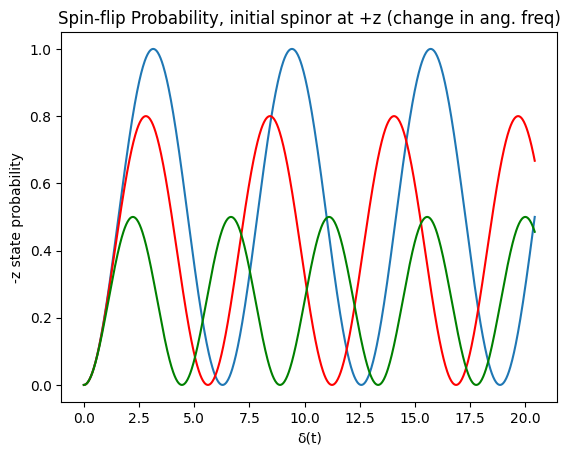

In [71]:
import matplotlib.pyplot as plt
#Looking good so far!
delta = Delta(Bxy, Bz, w[0])
plt.plot(delta, prob[0])
plt.plot(delta, prob[1], color="r")
plt.plot(delta, prob[2], color="g")
plt.title("Spin-flip Probability, initial spinor at +z (change in ang. freq)")
plt.xlabel("\u03B4(t)")
plt.ylabel("-z state probability")
plt.show()

In [63]:
# Let Bx = 1, w = gubBxy/h
#Plot for various Bz values e.g, (w-w0)/w1 = a --> Bz = hw/guB - aBxy
Bxy = 1.0
w = g*uB*Bxy/h
a = np.array([0.0, 0.5, 1.0])
Bz = h*w/(g*uB) - a*Bxy
t = np.linspace(0, -1*6.5*np.pi/w, 1000)

prob = RabiProb(Bxy, Bz, w)

/tmp/ipykernel_248461/2171805647.py:6: RuntimeWarning: divide by zero encountered in divide
  chi = np.arctan(w1/(w0-w))


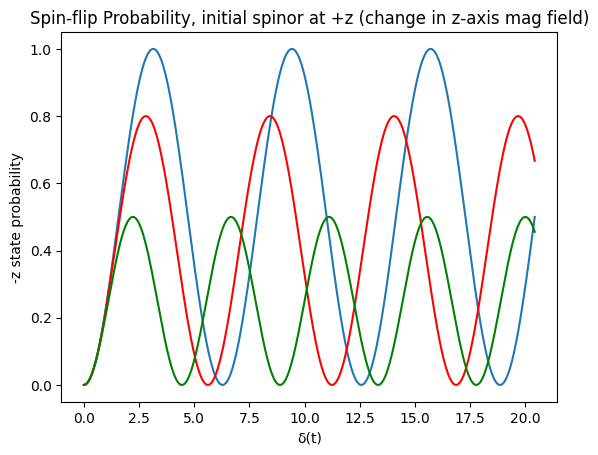

In [64]:
delta = Delta(Bxy, Bz[0], w)
plt.plot(delta, prob[0])
plt.plot(delta, prob[1], color="r")
plt.plot(delta, prob[2], color="g")
plt.title("Spin-flip Probability, initial spinor at +z (change in z-axis mag field)")
plt.xlabel("\u03B4(t)")
plt.ylabel("-z state probability")
plt.show()

In [89]:
#Plot time-dependent probability of spin-flip starting from North pole
# Let Bxy = Bz = 1
#Plot for various ang. freq. values e.g, (w-w0)/w1 = a --> w = gu_B(aB_xy + B_z)/h

Bxy, Bz = 1.0, 1.0
a = np.array([0.0, 0.5, 1.0])
w = g*uB/h*(Bxy*a + Bz)
t = np.linspace(0, -1*6.5*np.pi/w[0], 1000)

n0 = np.array([0, 0, 1])
# Matrix U has format (3,3,N,A)
# (3,3) for the matrix elements
# N for the time iteration of the matrix
# A for each change in select parameter
U = UMx(Bxy, Bz, w)
prob = GenProb(U, n0)


/tmp/ipykernel_248461/762535434.py:13: RuntimeWarning: divide by zero encountered in divide
  chi = np.arctan(w1/(w0-w))


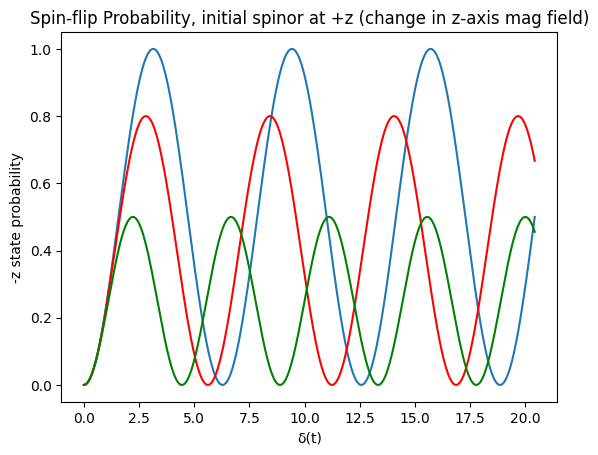

In [91]:
delta = Delta(Bxy, Bz, w[0])
plt.plot(delta, prob[0])
plt.plot(delta, prob[1], color="r")
plt.plot(delta, prob[2], color="g")
plt.title("Spin-flip Probability, initial spinor at +z (change in z-axis mag field)")
plt.xlabel("\u03B4(t)")
plt.ylabel("-z state probability")
plt.show()

In [92]:
#Plot time-dependent probability of spin-flip starting from +x axis
# Let Bxy = Bz = 1
#Plot for various ang. freq. values e.g, (w-w0)/w1 = a --> w = gu_B(aB_xy + B_z)/h

Bxy, Bz = 1.0, 1.0
a = np.array([0.0, 0.5, 1.0])
w = g*uB/h*(Bxy*a + Bz)
t = np.linspace(0, -1*6.5*np.pi/w[0], 1000)

n0 = np.array([1, 0, 0])
# Matrix U has format (3,3,N,A)
# (3,3) for the matrix elements
# N for the time iteration of the matrix
# A for each change in select parameter
U = UMx(Bxy, Bz, w)
prob = GenProb(U, n0)


/tmp/ipykernel_248461/762535434.py:13: RuntimeWarning: divide by zero encountered in divide
  chi = np.arctan(w1/(w0-w))


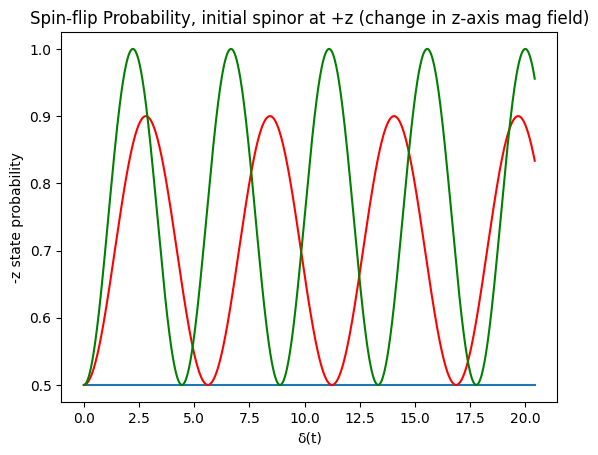

In [93]:
delta = Delta(Bxy, Bz, w[0])
plt.plot(delta, prob[0])
plt.plot(delta, prob[1], color="r")
plt.plot(delta, prob[2], color="g")
plt.title("Spin-flip Probability, initial spinor at +z (change in z-axis mag field)")
plt.xlabel("\u03B4(t)")
plt.ylabel("-z state probability")
plt.show()